# Проектная работа
## Исследование статистики гонок «Формулы 1»

### 1    EDA анализ

Импортируем необходимые в работе библиотеки. Прежде всего нам потребуется библиотека Pandas для обработки и анализа данных. 

In [600]:
import pandas as pd

Напишем также специальную функцию для проверки таблиц на отсутствующие значения, обозначающиеся здесь в виде \N.

In [601]:
# Проверка отсутствующих значений
def isn(df):
    return df.isin(['\\N']).sum()

Приступим к изучению данных. Всего имеем 14 датасетов в формате .csv:

1. circuits.csv
2. constructor_results.csv
3. constructor_standings.csv
4. constructors.csv 
5. driver_standings.csv 
6. drivers.csv
7. lap_times.csv
8. pit_stops.csv
9. qualifying.csv
10. races.csv
11. results.csv 
12. seasons.csv 
13. sprint_results.csv
14. status.csv

Для того, чтобы проводить дальнейшую работу с данными, нам необходимо провести разведочный анализ. Нужно понять, какие колонки в каких таблицах мы имеем, типы данных, ключевые столбцы, найти пропуски, и, при необходимости, заполнить или избавиться от них.

#### 1.1 circuits.csv

Начнем с датасета с circuits.csv, в котором приведены данные обо всех гоночных трассах, на которых проводились соревнования.
Выведем первые 5 строк таблицы:

In [602]:
df_cir = pd.read_csv('circuits.csv')
df_cir.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


Выведем информацию о содержании колонок:

In [603]:
df_cir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   79 non-null     int64  
 1   circuitRef  79 non-null     object 
 2   name        79 non-null     object 
 3   location    79 non-null     object 
 4   country     79 non-null     object 
 5   lat         79 non-null     float64
 6   lng         79 non-null     float64
 7   alt         79 non-null     object 
 8   url         79 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.7+ KB


Таблица имеет 9 колонок:

0. circuitId - ID трассы - ключ-идентификатор трассы
1. circuitRef - условное обозначение трассы
2. name - название трассы
3. location - город, в котором находится трасса
4. country - страна, в которой находится трасса
5. lat - географическая широта местоположения 
6. lng - географическая долгота местоположения
7. alt - высота над уровнем моря
8. url - ссылка на статью в Википедии о трассе

Пропуски данных отстутствуют - каждая колонка имеет 79 строк

Однако, можем заметить, что неизвестные данные могут обозначаться как \N:

In [604]:
df_cir

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
74,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108,http://en.wikipedia.org/wiki/Algarve_Internati...
75,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255,http://en.wikipedia.org/wiki/Mugello_Circuit
76,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.63190,39.10440,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
77,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,\N,http://en.wikipedia.org/wiki/Losail_Internatio...


Определим количество пропусков с помощью заранее написанной функции isn():

In [605]:
isn(df_cir)

circuitId     0
circuitRef    0
name          0
location      0
country       0
lat           0
lng           0
alt           2
url           0
dtype: int64

Нет данных по высоте для двух трасс - losail и miami. Дополним данные значениями из сети

In [606]:
df_cir.loc[77, 'alt'] = 5
df_cir.loc[78, 'alt'] = 2

Проверим успешность заполнения:

In [607]:
df_cir

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
74,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108,http://en.wikipedia.org/wiki/Algarve_Internati...
75,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255,http://en.wikipedia.org/wiki/Mugello_Circuit
76,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.63190,39.10440,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
77,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,5,http://en.wikipedia.org/wiki/Losail_Internatio...


Поскольку все данные по высоте теперь выражаются в цифрах, переведем эту колонку числовой тип данных:

In [608]:
df_cir['alt'] = pd.to_numeric(df_cir['alt'])

In [609]:
df_cir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   79 non-null     int64  
 1   circuitRef  79 non-null     object 
 2   name        79 non-null     object 
 3   location    79 non-null     object 
 4   country     79 non-null     object 
 5   lat         79 non-null     float64
 6   lng         79 non-null     float64
 7   alt         79 non-null     int64  
 8   url         79 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 5.7+ KB


#### 1.2 constructor_results.csv

Датасет constructor_results.csv содержит результаты гонок по конструкторам гоночных автомобилей

In [610]:
df_constr_res = pd.read_csv('constructor_results.csv')
df_constr_res

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N
...,...,...,...,...,...
11975,16475,1076,51,4.0,\N
11976,16476,1076,213,2.0,\N
11977,16477,1076,3,1.0,\N
11978,16478,1076,117,0.0,\N


In [611]:
df_constr_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11980 entries, 0 to 11979
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   constructorResultsId  11980 non-null  int64  
 1   raceId                11980 non-null  int64  
 2   constructorId         11980 non-null  int64  
 3   points                11980 non-null  float64
 4   status                11980 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 468.1+ KB


Таблица имеет 5 колонок:

0. constructorResultsId - ключ-идентификатор результата конструктора
1. raceId - идентификатор гонки
2. constructorId - идентификатор конструктора
3. points - кол-во очков за гонку
4. status - статус результата

Каждая колонка имеет 11980 записей, однако имеется большое количество \N в status

In [612]:
isn(df_constr_res)

constructorResultsId        0
raceId                      0
constructorId               0
points                      0
status                  11963
dtype: int64

Для того, чтобы определить значение и необходимость колонки status, требуется проанализировать остальные данные.

Посмотрим, какие вообще значения могут быть в колонке status, если не \N. 

In [613]:
df_constr_res.loc[df_constr_res['status'] != '\\N']

,constructorResultsId,raceId,constructorId,points,status
185,186,36,1,14.0,D
195,196,37,1,18.0,D
207,208,38,1,12.0,D
218,219,39,1,14.0,D
228,229,40,1,18.0,D
239,240,41,1,12.0,D
250,251,42,1,18.0,D
262,263,43,1,8.0,D
273,274,44,1,14.0,D
283,284,45,1,10.0,D


Видим, что единственным возможным значением является некое D, и относится оно только к производителю с ID 1

#### 1.3 constructor_standings.csv 

Датасет constructor_standings.csv содержит финальные позиции производителей по результатам гонок

In [614]:
df_constr_st = pd.read_csv('constructor_standings.csv')
df_constr_st

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0
...,...,...,...,...,...,...,...
12736,28158,1076,213,10.0,8,8,0
12737,28159,1076,117,0.0,10,10,0
12738,28160,1076,3,1.0,9,9,0
12739,28161,1076,1,24.0,4,4,0


In [615]:
df_constr_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12741 entries, 0 to 12740
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   constructorStandingsId  12741 non-null  int64  
 1   raceId                  12741 non-null  int64  
 2   constructorId           12741 non-null  int64  
 3   points                  12741 non-null  float64
 4   position                12741 non-null  int64  
 5   positionText            12741 non-null  object 
 6   wins                    12741 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 696.9+ KB


Таблица имеет 7 колонок:

0. constructorStandingsId - ключ-идентификатор позиции конструктора
1. raceId - идентификатор гонки
2. constructorId - идентификатор конструктора
3. points - кол-во очков за гонку
4. position - итоговая позиция по результатам гонки
5. positionText - строковое представление position (тип данных object)
6. wins - кол-во побед

Каждая колонка имеет 12741 запись. Посмотрим, есть ли в ней значения \N

In [616]:
isn(df_constr_st)

constructorStandingsId    0
raceId                    0
constructorId             0
points                    0
position                  0
positionText              0
wins                      0
dtype: int64

Пропуски отсутствуют

#### 1.4 constructors.csv

Датасет constructors.csv содержит информацию о конструкторах

In [617]:
df_constr = pd.read_csv('constructors.csv')
df_constr

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


In [618]:
df_constr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   211 non-null    int64 
 1   constructorRef  211 non-null    object
 2   name            211 non-null    object
 3   nationality     211 non-null    object
 4   url             211 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB


Таблица имеет 5 колонок:

0. constructorId - идентификатор конструктора
1. constructorRef - условное обозначение конструктора
2. name - название конструктора 
3. nationality - страна происхождения
4. url - ссылка на статью в Википедии
    

Каждая колонка имеет 211 записей. Посмотрим, есть ли в ней значения \N

In [619]:
isn(df_constr)

constructorId     0
constructorRef    0
name              0
nationality       0
url               0
dtype: int64

Пропуски отсутствуют

#### 1.5 driver_standings.csv

Датасет driver_standings.csv содержит информацию о финишных позициях гонщиков.

In [620]:
df_driver_st = pd.read_csv('driver_standings.csv')
df_driver_st

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
33471,71308,1076,807,0.0,19,19,0
33472,71309,1076,815,30.0,4,4,0
33473,71310,1076,830,25.0,6,6,1
33474,71311,1076,842,6.0,12,12,0


In [621]:
df_driver_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33476 entries, 0 to 33475
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  33476 non-null  int64  
 1   raceId             33476 non-null  int64  
 2   driverId           33476 non-null  int64  
 3   points             33476 non-null  float64
 4   position           33476 non-null  int64  
 5   positionText       33476 non-null  object 
 6   wins               33476 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.8+ MB


Таблица имеет 7 колонок:

0. driverStandingsId - идентификатор результата водителя
1. raceId - идентификатор гонки
2. driverId - идентификатор водителя
3. points - кол-во очков за гонку
4. position - позиция
5. positionText - позиция (текстовый тип)
6. wins - победитель или нет (1/0)

Каждая колонка имеет 33476 записей. Посмотрим, есть ли в ней значения \N

In [622]:
isn(df_driver_st)

driverStandingsId    0
raceId               0
driverId             0
points               0
position             0
positionText         0
wins                 0
dtype: int64

Пропуски отсутствуют

#### 1.6 drivers.csv

Датасет drivers.csv содержми информацию о гонщиках.

In [623]:
df_drivers = pd.read_csv('drivers.csv')
df_drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [624]:
df_drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     854 non-null    int64 
 1   driverRef    854 non-null    object
 2   number       854 non-null    object
 3   code         854 non-null    object
 4   forename     854 non-null    object
 5   surname      854 non-null    object
 6   dob          854 non-null    object
 7   nationality  854 non-null    object
 8   url          854 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.2+ KB


Таблица имеет 9 колонок:

0. driverId - идентификатор гонщика
1. driverRef - условное обозначение гонщика
2. number - номер гонщика
3. code - трехбуквенный код гонщика
4. forename - имя гонщика
5. surname - фамилия гонщика
6. dob - дата рождения
7. nationality - гражданство 
8. url - ссылка на страницу Википедии о гонщике 

Каждая колонка имеет 854 записи. Посмотрим, есть ли в ней значения \N

In [625]:
isn(df_drivers)

driverId         0
driverRef        0
number         803
code           757
forename         0
surname          0
dob              0
nationality      0
url              0
dtype: int64

Видим, что у большинства гонщиков нет данных об их номере и коде.

In [626]:
df_drivers.loc[df_drivers['code'] != '\\N']

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
849,851,aitken,89,AIT,Jack,Aitken,1995-09-23,British,http://en.wikipedia.org/wiki/Jack_Aitken
850,852,tsunoda,22,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda
851,853,mazepin,9,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher


Вероятно, это связано с тем, что код гонщика появился относительно недавно. 

Для удобства в дальнейшей работе, объединим колонки с именем и фамилией гонщика в одну колонку name:

In [627]:
df_drivers['name'] = df_drivers['forename'] + ' ' + df_drivers['surname']
df_drivers = df_drivers.drop(columns=['forename', 'surname'])
df_drivers = df_drivers[['driverId', 'name', 'driverRef', 'number', 'code', 'dob', 'nationality', 'url']]
df_drivers.head()

,driverId,name,driverRef,number,code,dob,nationality,url
0,1,Lewis Hamilton,hamilton,44,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,Nick Heidfeld,heidfeld,\N,HEI,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,Nico Rosberg,rosberg,6,ROS,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,Fernando Alonso,alonso,14,ALO,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,Heikki Kovalainen,kovalainen,\N,KOV,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


#### 1.7 lap_times.csv

Датасет lap_times.csv содержит информацию о временах кругов гонок.

In [628]:
df_lap = pd.read_csv('lap_times.csv')
df_lap.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [629]:
df_lap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517573 entries, 0 to 517572
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        517573 non-null  int64 
 1   driverId      517573 non-null  int64 
 2   lap           517573 non-null  int64 
 3   position      517573 non-null  int64 
 4   time          517573 non-null  object
 5   milliseconds  517573 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 23.7+ MB


Таблица имеет 6 колонок:

0. raceId - идентификатор гонки
1. driverId - идентификатор гонщика
2. lap - номер круга
3. position - итоговая позиция
4. time - время круга
5. milliseconds - время в милисекундах

Каждая колонка имеет 517573 записи. Посмотрим, есть ли в ней значения \N

In [630]:
isn(df_lap)

raceId          0
driverId        0
lap             0
position        0
time            0
milliseconds    0
dtype: int64

#### 1.8 pit_stops.csv

Датасет pit_stops.csv содержит информацию о пит-стопах во время гонок

In [631]:
df_pits = pd.read_csv('pit_stops.csv')
df_pits.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [632]:
df_pits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        8928 non-null   int64 
 1   driverId      8928 non-null   int64 
 2   stop          8928 non-null   int64 
 3   lap           8928 non-null   int64 
 4   time          8928 non-null   object
 5   duration      8928 non-null   object
 6   milliseconds  8928 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 488.4+ KB


Таблица имеет 7 колонок:

0. raceId - идентификатор гонки
1. driverId - идентификатор гонщика
2. stop - номер пит-стопа
3. lap - номер круга
4. time - время пит-стопа
5. duration - продолжительность пит-стопа
6. milliseconds - продолжительность пит-стопа в милисекундах

Каждая колонка имеет 8928 записей. Посмотрим, есть ли в ней значения \N

In [633]:
isn(df_pits)

raceId          0
driverId        0
stop            0
lap             0
time            0
duration        0
milliseconds    0
dtype: int64

#### 1.9 qualifying.csv

Датасет qualifying.csv содержит информацию о квалификационных заездах.

In [634]:
df_qual = pd.read_csv('qualifying.csv')
df_qual.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [635]:
df_qual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9195 entries, 0 to 9194
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      9195 non-null   int64 
 1   raceId         9195 non-null   int64 
 2   driverId       9195 non-null   int64 
 3   constructorId  9195 non-null   int64 
 4   number         9195 non-null   int64 
 5   position       9195 non-null   int64 
 6   q1             9187 non-null   object
 7   q2             9057 non-null   object
 8   q3             8930 non-null   object
dtypes: int64(6), object(3)
memory usage: 646.6+ KB


Таблица имеет 9 колонок:

0. qualifyId - идентификатор квалификационного заезда 
1. raceId - идентификатор гонки
2. driverId - идентификатор гонщика
3. constructorId - идентификатор конструктора
4. number - номер гоночной машины
5. position - итоговая позиция
6. q1 - время квалификации 1 
7. q1 - время квалификации 2
8. q1 - время квалификации 3 

Колонки q1, q2, и q3 имеют отсутствующие записи. Можно предположить, что не все гонщики смогли пройти квалификацию и сошли на одном из ее этапов, либо по каким-то причинам квалификации не было. Проверим также на \N

In [636]:
isn(df_qual)

qualifyId           0
raceId              0
driverId            0
constructorId       0
number              0
position            0
q1                137
q2               4175
q3               5932
dtype: int64

Помимо пропусков, также имеется большое количество \N

#### 1.10 races.csv

Датасет races.csv содержит информацию об этапах гонок. 

In [637]:
df_race = pd.read_csv('races.csv', parse_dates=['date'])
df_race.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-05-04,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-10-05,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [638]:
df_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   raceId     1079 non-null   int64         
 1   year       1079 non-null   int64         
 2   round      1079 non-null   int64         
 3   circuitId  1079 non-null   int64         
 4   name       1079 non-null   object        
 5   date       1079 non-null   datetime64[ns]
 6   time       1079 non-null   object        
 7   url        1079 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 67.6+ KB


Таблица содержит 8 колонок:

0. raceId - идентификатор гонки 
1. year - год проведения гонки
2. round - номер (этапа) гонки
3. circuitId - идентификатор трассы
4. name - название этапа гонок
5. date - дата проведения гонки 
6. time - время проведения гонки
7. url - ссылка на статью Википедии о гонке

Каждая колонка имеет 1079 записей. Посмотрим, есть ли в ней значения \N

In [639]:
isn(df_race)

raceId         0
year           0
round          0
circuitId      0
name           0
date           0
time         731
url            0
dtype: int64

Отсутствует большое количество данных о продолжительности этапов

#### 1.11 results.csv

Датасет results.csv содержит данные о результатах гонок

In [640]:
df_res = pd.read_csv('results.csv')
df_res.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [641]:
df_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25460 entries, 0 to 25459
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25460 non-null  int64  
 1   raceId           25460 non-null  int64  
 2   driverId         25460 non-null  int64  
 3   constructorId    25460 non-null  int64  
 4   number           25460 non-null  object 
 5   grid             25460 non-null  int64  
 6   position         25460 non-null  object 
 7   positionText     25460 non-null  object 
 8   positionOrder    25460 non-null  int64  
 9   points           25460 non-null  float64
 10  laps             25460 non-null  int64  
 11  time             25460 non-null  object 
 12  milliseconds     25460 non-null  object 
 13  fastestLap       25460 non-null  object 
 14  rank             25460 non-null  object 
 15  fastestLapTime   25460 non-null  object 
 16  fastestLapSpeed  25460 non-null  object 
 17  statusId    

Таблица содержит 18 колонок:

0. resultId - идентификатор результата 
1. raceId - идентификатор гонки
2. driverId - идентификатор гонщика
3. constructorId - идентификатор конструктора
4. number - номер гоночной машины
5. grid - позиция на старте
6. position - итоговая позиция
7. positionText - итоговая позиция (с текстовыми вариантами позиции)
8. positionOrder - итоговая позиция в числах (наиболее удобное представление)
9. points - кол-во очков
10. laps - число кругов
11. time - время круга (лучшее для 1 места и +отставание других участников)
12. milliseconds - время круга в милисекундах 
13. fastestLap - номер самого быстрого круга
14. rank - рейтинг быстрейшего круга
15. fastestLapTime - время самого быстрого круга (первое место в гонке не значит самое быстрое время круга)
16. fastestLapSpeed - скорость самого быстрого круга
17. statusId - идентификатор статуса результата 

Каждая колонка имеет 25460 записей. Посмотрим, есть ли в ней значения \N

In [642]:
isn(df_res)

resultId               0
raceId                 0
driverId               0
constructorId          0
number                 6
grid                   0
position           10797
positionText           0
positionOrder          0
points                 0
laps                   0
time               18610
milliseconds       18611
fastestLap         18450
rank               18249
fastestLapTime     18450
fastestLapSpeed    18450
statusId               0
dtype: int64

Имеется большое число отстутствующих данных по результатам. Это связано с тем, что не все гонщики успешно завершили (или даже стартовали) гонку. 

#### 1.12 seasons.csv

Датасет seasons.csv содержит данные о сезонах (годах проведения) соревнований. 1 сезон гонки длится 1 год. 

In [643]:
df_seas = pd.read_csv('seasons.csv')
df_seas.head()

,year,url
0,2009,http://en.wikipedia.org/wiki/2009_Formula_One_...
1,2008,http://en.wikipedia.org/wiki/2008_Formula_One_...
2,2007,http://en.wikipedia.org/wiki/2007_Formula_One_...
3,2006,http://en.wikipedia.org/wiki/2006_Formula_One_...
4,2005,http://en.wikipedia.org/wiki/2005_Formula_One_...


In [644]:
df_seas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    73 non-null     int64 
 1   url     73 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


Таблица содержит 2 колонки:

0. year - сезон (год проведения) гонки
1. url - сслыка на статью Википедии о сезоне "Формулы"

Каждая колонка имеет 73 записи. Посмотрим, есть ли в ней значения \N

In [645]:
isn(df_seas)

year    0
url     0
dtype: int64

#### 1.13 sprint_results.csv

Датасет sprint_results.csv содержит данные о результатах спринта - субботней мини-гонки

In [646]:
df_sprint = pd.read_csv('sprint_results.csv')
df_sprint.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1


In [647]:
df_sprint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   resultId        60 non-null     int64 
 1   raceId          60 non-null     int64 
 2   driverId        60 non-null     int64 
 3   constructorId   60 non-null     int64 
 4   number          60 non-null     int64 
 5   grid            60 non-null     int64 
 6   position        60 non-null     object
 7   positionText    60 non-null     object
 8   positionOrder   60 non-null     int64 
 9   points          60 non-null     int64 
 10  laps            60 non-null     int64 
 11  time            60 non-null     object
 12  milliseconds    60 non-null     object
 13  fastestLap      60 non-null     object
 14  fastestLapTime  60 non-null     object
 15  statusId        60 non-null     int64 
dtypes: int64(10), object(6)
memory usage: 7.6+ KB


Таблица содержит 16 колонок:

0. resultId - идентификатор результата спринта
1. raceId - идентификатор гонки
2. driverId - идентификатор гонщика
3. constructorId - идентификатор конструктора
4. number - номер гоночной машины
5. grid - позиция на старте
6. position - итоговая позиция
7. positionText - итоговая позиция (с текстовыми вариантами позиции)
8. positionOrder - итоговая позиция в числах (наиболее удобное представление)
9. points - кол-во очков
10. laps - число кругов
11. time - время круга (лучшее для 1 места и +отставание других участников)
12. milliseconds - время круга в милисекундах
13. fastestLap - номер самого быстрого круга
14. fastestLapTime - время самого быстрого круга (первое место в гонке не значит самое быстрое время круга)
15. statusId - идентификатор статуса результата

Каждая колонка имеет 60 записей. Посмотрим, есть ли в ней значения \N

In [648]:
isn(df_sprint)

resultId          0
raceId            0
driverId          0
constructorId     0
number            0
grid              0
position          2
positionText      0
positionOrder     0
points            0
laps              0
time              2
milliseconds      2
fastestLap        1
fastestLapTime    1
statusId          0
dtype: int64

Есть пропуски, вероятно связанные с неудачными заездами

#### 1.14 status.csv

Датасет status.csv содержит обозначения статуса заезда для участника соревнования. В случае успешного завершения гонки, заезд имеет статус Finished, остальные статусы обозначанют различные варианты схода - поломки, дисквалификации, аварии и т.п.

In [649]:
df_status = pd.read_csv('status.csv')
df_status.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [650]:
df_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   statusId  137 non-null    int64 
 1   status    137 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


Таблица содержит 2 колонки: 

0. statusId - идентификатор статуса
1. status - статус (финишировал, вид поломки, авария...)

Каждая колонка имеет 137 записей. Посмотрим, есть ли в ней значения \N

In [651]:
isn(df_status)

statusId    0
status      0
dtype: int64

### 2 Подготовка данных к составлению отчетов

#### 2.1 Выборка по сезону 2020

В исследовании будем рассматривать результаты гонок на примере сезона 2020 года, так как данные по ним достоточно свежие и полные. 

Рассмотрим для начала таблицу df_race. Выделим в отдельную таблицу df_race_20_21 информацию о проходящих Гран-при, избавившись от колонок со ссылками на статьи Википедии и времени проведения гонки

In [652]:
df_race_20_21 = df_race.loc[df_race["date"].between("2020-01-01", "2021-12-31")]
df_race_20_21 = df_race_20_21.drop(columns=['url', 'time'])
df_race_20_21

,raceId,year,round,circuitId,name,date
1018,1031,2020,1,70,Austrian Grand Prix,2020-05-07
1019,1032,2020,2,70,Styrian Grand Prix,2020-12-07
1020,1033,2020,3,11,Hungarian Grand Prix,2020-07-19
1021,1034,2020,4,9,British Grand Prix,2020-02-08
1022,1035,2020,5,9,70th Anniversary Grand Prix,2020-09-08
1023,1036,2020,6,4,Spanish Grand Prix,2020-08-16
1024,1037,2020,7,13,Belgian Grand Prix,2020-08-30
1025,1038,2020,8,14,Italian Grand Prix,2020-06-09
1026,1039,2020,9,76,Tuscan Grand Prix,2020-09-13
1027,1040,2020,10,71,Russian Grand Prix,2020-09-27


In [653]:
df_race_20_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 1018 to 1057
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   raceId     39 non-null     int64         
 1   year       39 non-null     int64         
 2   round      39 non-null     int64         
 3   circuitId  39 non-null     int64         
 4   name       39 non-null     object        
 5   date       39 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 2.1+ KB


Выделем также отдельную таблицу df_race_20 для сезона 2020.

In [654]:
df_race_20 = df_race_20_21.loc[df_race["date"].between("2020-01-01", "2020-12-31")]
df_race_20

,raceId,year,round,circuitId,name,date
1018,1031,2020,1,70,Austrian Grand Prix,2020-05-07
1019,1032,2020,2,70,Styrian Grand Prix,2020-12-07
1020,1033,2020,3,11,Hungarian Grand Prix,2020-07-19
1021,1034,2020,4,9,British Grand Prix,2020-02-08
1022,1035,2020,5,9,70th Anniversary Grand Prix,2020-09-08
1023,1036,2020,6,4,Spanish Grand Prix,2020-08-16
1024,1037,2020,7,13,Belgian Grand Prix,2020-08-30
1025,1038,2020,8,14,Italian Grand Prix,2020-06-09
1026,1039,2020,9,76,Tuscan Grand Prix,2020-09-13
1027,1040,2020,10,71,Russian Grand Prix,2020-09-27


In [655]:
df_race_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 1018 to 1034
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   raceId     17 non-null     int64         
 1   year       17 non-null     int64         
 2   round      17 non-null     int64         
 3   circuitId  17 non-null     int64         
 4   name       17 non-null     object        
 5   date       17 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 952.0+ bytes


#### 2.2 Добавление таблиц в бд

Анализируя имеющиеся таблицы, можем заметить, что большинство из них имеют общие столбцы - идентификторы ID, являющиеся ключами, связывающие между собой различные таблицы с данными. Совокупность этих таблиц можно представить в виде реляционной базы данных, причем основными таблицами, представляющими интерес для формирования отчетных таблиц, являются df_constr_res и df_res, а также другие таблицы с результатами. Эти таблицы обладают признаками 3нф. Это выражается в том, что нам сложно получить представление о результатах, глядя в эти таблицы, поскольку вместо текстовых обозначений команд, конструкторов и гонщиков мы видим там ключи к соответствующим таблицам. Для формирования отчетов по результатам потребуется объединить несколько таблиц по ключевым столбцам, для этого можем воспользоваться языком запросов SQL или функцией merge() из pandas.

Для работы с SQL будем использовать sqlite3 и sqlalchemy

In [656]:
import sqlite3
from sqlite3 import Error

Для начала внесем в базу информацию о гонках из таблицы df_res

In [657]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

In [658]:
df_res.to_sql('df_res', con=engine, index=False)

25460

Проверяем корректность загрузки в базу

In [659]:
pd.DataFrame(engine.execute("SELECT * FROM df_res"))

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25455,25461,1076,849,3,6,18,16,16,16,0.0,57,\N,\N,49,18,1:23.882,226.518,11
25456,25462,1076,4,214,14,10,17,17,17,0.0,57,\N,\N,57,2,1:20.846,235.024,11
25457,25463,1076,830,9,1,2,\N,R,18,0.0,38,\N,\N,37,6,1:21.677,232.633,9
25458,25464,1076,20,117,5,17,\N,R,19,0.0,22,\N,\N,17,19,1:25.189,223.042,3


Пусть конструктор Haas F1 Team будет называться Haas. 

In [660]:
df_constr['name'] = df_constr['name'].replace('Haas F1 Team', 'Haas')
df_constr

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


Теперь можем загрузить в базу df_constr, df_race_20, df_drivers

In [661]:
df_constr.to_sql('df_constr', con=engine, index=False)

211

In [662]:
pd.DataFrame(engine.execute("SELECT * FROM df_constr"))

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


In [663]:
df_race_20.to_sql('df_race_20', con=engine, index=False)

17

In [664]:
df_drivers.to_sql('df_drivers', con=engine, index=False)

854

In [665]:
pd.DataFrame(engine.execute("SELECT * FROM df_drivers"))

,driverId,name,driverRef,number,code,dob,nationality,url
0,1,Lewis Hamilton,hamilton,44,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,Nick Heidfeld,heidfeld,\N,HEI,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,Nico Rosberg,rosberg,6,ROS,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,Fernando Alonso,alonso,14,ALO,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,Heikki Kovalainen,kovalainen,\N,KOV,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...
849,851,Jack Aitken,aitken,89,AIT,1995-09-23,British,http://en.wikipedia.org/wiki/Jack_Aitken
850,852,Yuki Tsunoda,tsunoda,22,TSU,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda
851,853,Nikita Mazepin,mazepin,9,MAZ,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin
852,854,Mick Schumacher,mick_schumacher,47,MSC,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher


In [666]:
df_cir.to_sql('df_cir', con=engine, index=False)

79

In [667]:
df_constr_res.to_sql('df_constr_res', con=engine, index=False)


11980

#### 2.3 Обогащение данных

Начнем создавать представления для формирования отчетов. С помощью SQL запроса, объединяющего df_res и df_drivers создадим таблицу constr_drivers, с помощью которой легко сопоставить гонщка с его консруктором. 

In [668]:
df_drivers.columns

Index(['driverId', 'name', 'driverRef', 'number', 'code', 'dob', 'nationality',
       'url'],
      dtype='object')

In [669]:
constr_drivers = pd.DataFrame(
    engine.execute(
        '''SELECT df_constr.name AS constr_name, 
                df_drivers.name AS driver_name, code, df_constr.constructorId, df_drivers.driverId
                FROM df_res 
                INNER JOIN df_drivers ON df_res.driverId = df_drivers.driverId
                INNER JOIN df_constr ON df_res.constructorId = df_constr.constructorId
                INNER JOIN df_race_20 ON df_res.raceID = df_race_20.raceID
                GROUP BY constr_name, driver_name
                ORDER BY constr_name

                            '''))

In [670]:
constr_drivers

,constr_name,driver_name,code,constructorId,driverId
0,Alfa Romeo,Antonio Giovinazzi,GIO,51,841
1,Alfa Romeo,Kimi Räikkönen,RAI,51,8
2,AlphaTauri,Daniil Kvyat,KVY,213,826
3,AlphaTauri,Pierre Gasly,GAS,213,842
4,Ferrari,Charles Leclerc,LEC,6,844
5,Ferrari,Sebastian Vettel,VET,6,20
6,Haas,Kevin Magnussen,MAG,210,825
7,Haas,Pietro Fittipaldi,FIT,210,850
8,Haas,Romain Grosjean,GRO,210,154
9,McLaren,Carlos Sainz,SAI,1,832


При рассмотрении датасетов мы можем обнаружить, что нигде не указаны команды. В современной Формуле-1 команды должны иметь права интеллектуальной собственности на своё шасси, поэтому понятия «команда» и «производитель шасси» обычно являются синонимами, однако в отчетах часто имеют место оба понятия, поэтому добавим команды.
В результате получим таблицу team_df: 

In [671]:
team = {'teamID': [1,2,3,4,5,6,7,8,9,10], 
        'team_name': ['Alfa Romeo Racing Orlen',
                     'Scuderia AlphaTauri Honda',
                     'Scuderia Ferrari Mission Winnow',
                     'Haas F1 Team',
                     'McLaren F1 Team',
                     'Mercedes AMG Petronas Formula One Team',
                     'BWT Racing Point F1 Team',
                     'Aston Martin Red Bull Racing',
                     'Renault DP World F1 Team',
                     'Williams Racing']}
team_df = pd.DataFrame.from_dict(team)
team_df

,teamID,team_name
0,1,Alfa Romeo Racing Orlen
1,2,Scuderia AlphaTauri Honda
2,3,Scuderia Ferrari Mission Winnow
3,4,Haas F1 Team
4,5,McLaren F1 Team
5,6,Mercedes AMG Petronas Formula One Team
6,7,BWT Racing Point F1 Team
7,8,Aston Martin Red Bull Racing
8,9,Renault DP World F1 Team
9,10,Williams Racing


### 3 Создание отчетных представлений

#### 3.1 Таблица с участниками

Объединим конструкторов с командами в таблице constr_teams

In [672]:
constr = constr_drivers.drop(columns=['driver_name', 'code', 'driverId'])
constr = constr.drop_duplicates()
constr['teamID'] = [1,2,3,4,5,6,7,8,9,10]
constr

,constr_name,constructorId,teamID
0,Alfa Romeo,51,1
2,AlphaTauri,213,2
4,Ferrari,6,3
6,Haas,210,4
9,McLaren,1,5
11,Mercedes,131,6
14,Racing Point,211,7
17,Red Bull,9,8
19,Renault,4,9
21,Williams,3,10


In [673]:
constr_teams = pd.merge(constr, team_df, on='teamID')
constr_teams = constr_teams[['constr_name', 'team_name', 'constructorId', 'teamID']]
constr_teams

,constr_name,team_name,constructorId,teamID
0,Alfa Romeo,Alfa Romeo Racing Orlen,51,1
1,AlphaTauri,Scuderia AlphaTauri Honda,213,2
2,Ferrari,Scuderia Ferrari Mission Winnow,6,3
3,Haas,Haas F1 Team,210,4
4,McLaren,McLaren F1 Team,1,5
5,Mercedes,Mercedes AMG Petronas Formula One Team,131,6
6,Racing Point,BWT Racing Point F1 Team,211,7
7,Red Bull,Aston Martin Red Bull Racing,9,8
8,Renault,Renault DP World F1 Team,4,9
9,Williams,Williams Racing,3,10


Создадим отчет по участвовавшим в сезоне командам, конструкторам и гонщикам. Получаем таблицу con_dr_tm

In [674]:
con_dr_tm = pd.merge(constr_drivers, constr_teams, on='constructorId')
con_dr_tm = con_dr_tm[
    ['team_name','constr_name_x', 'driver_name', 'code', 
        'constructorId', 'driverId', 'teamID']]
con_dr_tm = con_dr_tm.rename(columns={"constr_name_x": "constr_name"})
con_dr_tm

,team_name,constr_name,driver_name,code,constructorId,driverId,teamID
0,Alfa Romeo Racing Orlen,Alfa Romeo,Antonio Giovinazzi,GIO,51,841,1
1,Alfa Romeo Racing Orlen,Alfa Romeo,Kimi Räikkönen,RAI,51,8,1
2,Scuderia AlphaTauri Honda,AlphaTauri,Daniil Kvyat,KVY,213,826,2
3,Scuderia AlphaTauri Honda,AlphaTauri,Pierre Gasly,GAS,213,842,2
4,Scuderia Ferrari Mission Winnow,Ferrari,Charles Leclerc,LEC,6,844,3
5,Scuderia Ferrari Mission Winnow,Ferrari,Sebastian Vettel,VET,6,20,3
6,Haas F1 Team,Haas,Kevin Magnussen,MAG,210,825,4
7,Haas F1 Team,Haas,Pietro Fittipaldi,FIT,210,850,4
8,Haas F1 Team,Haas,Romain Grosjean,GRO,210,154,4
9,McLaren F1 Team,McLaren,Carlos Sainz,SAI,1,832,5


In [675]:
con_dr_tm.to_sql('con_dr_tm', con=engine, index=False)

24

In [676]:
constr.to_sql('constr', con=engine, index=False)

10

#### 3.2 Календарь гонок

Создадим таблицу df_race_cir_20, отображающую расписание проведения гонок

In [677]:
df_race_cir_20 = pd.DataFrame(
    engine.execute(
        '''SELECT df_race_20.name AS race_name, round, 
        df_cir.name AS cirquit_name, location, country, date(date) AS date, 
        df_race_20.raceId
        FROM df_race_20 INNER JOIN df_cir 
        ON df_race_20.circuitId = df_cir.circuitId

                            '''))
df_race_cir_20

,race_name,round,cirquit_name,location,country,date,raceId
0,Austrian Grand Prix,1,Red Bull Ring,Spielberg,Austria,2020-05-07,1031
1,Styrian Grand Prix,2,Red Bull Ring,Spielberg,Austria,2020-12-07,1032
2,Hungarian Grand Prix,3,Hungaroring,Budapest,Hungary,2020-07-19,1033
3,British Grand Prix,4,Silverstone Circuit,Silverstone,UK,2020-02-08,1034
4,70th Anniversary Grand Prix,5,Silverstone Circuit,Silverstone,UK,2020-09-08,1035
5,Spanish Grand Prix,6,Circuit de Barcelona-Catalunya,Montmeló,Spain,2020-08-16,1036
6,Belgian Grand Prix,7,Circuit de Spa-Francorchamps,Spa,Belgium,2020-08-30,1037
7,Italian Grand Prix,8,Autodromo Nazionale di Monza,Monza,Italy,2020-06-09,1038
8,Tuscan Grand Prix,9,Autodromo Internazionale del Mugello,Mugello,Italy,2020-09-13,1039
9,Russian Grand Prix,10,Sochi Autodrom,Sochi,Russia,2020-09-27,1040


In [678]:
df_race_cir_20.to_sql('df_race_cir_20', con=engine, index=False)

17

#### 3.3 Результаты Гран-При

Создадим таблицу df_race_res_20 c реузльтатами всех этапов сезона

In [679]:
df_race_res_20 = pd.DataFrame(
    engine.execute(
        '''SELECT race_name, driver_name AS winner, team_name as winner_team
        FROM df_res 
        INNER JOIN df_race_cir_20 ON df_res.raceId = df_race_cir_20.raceId
        INNER JOIN con_dr_tm ON df_res.driverId = con_dr_tm.driverId and df_res.constructorId = con_dr_tm.constructorId
        WHERE positionOrder = 1 
        
        '''))
df_race_res_20

,race_name,winner,winner_team
0,Austrian Grand Prix,Valtteri Bottas,Mercedes AMG Petronas Formula One Team
1,Styrian Grand Prix,Lewis Hamilton,Mercedes AMG Petronas Formula One Team
2,Hungarian Grand Prix,Lewis Hamilton,Mercedes AMG Petronas Formula One Team
3,British Grand Prix,Lewis Hamilton,Mercedes AMG Petronas Formula One Team
4,70th Anniversary Grand Prix,Max Verstappen,Aston Martin Red Bull Racing
5,Spanish Grand Prix,Lewis Hamilton,Mercedes AMG Petronas Formula One Team
6,Belgian Grand Prix,Lewis Hamilton,Mercedes AMG Petronas Formula One Team
7,Italian Grand Prix,Pierre Gasly,Scuderia AlphaTauri Honda
8,Tuscan Grand Prix,Lewis Hamilton,Mercedes AMG Petronas Formula One Team
9,Russian Grand Prix,Valtteri Bottas,Mercedes AMG Petronas Formula One Team


С помощью небольшой визуализации, можем оценить количество выигранных гонок команды в сезоне

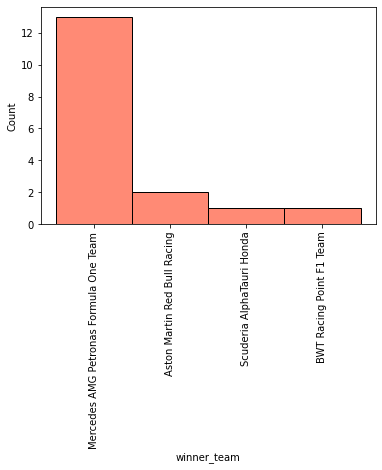

In [680]:
import seaborn as sns
sns.histplot(data=df_race_res_20, x=df_race_res_20["winner_team"], color = 'tomato')
plt.xticks(rotation=90)
p = ax.bar([], [], color = 'tomato')
#количество побед в гонках

#### 3.4 Личный зачет гонщиков

Создадим таблицу с личным зачетом гонщиков сезона с подсчетом очков, расположив гонщиков в порядце убывания очков

In [681]:
driver_res = pd.DataFrame(
    engine.execute(
        '''SELECT driver_name, SUM(points) AS sum_points
        FROM df_res
        INNER JOIN df_race_cir_20 ON df_res.raceId = df_race_cir_20.raceId
        INNER JOIN con_dr_tm ON df_res.driverId = con_dr_tm.driverId
        GROUP BY driver_name
        ORDER BY sum_points DESC
        '''))
driver_res

,driver_name,sum_points
0,Lewis Hamilton,347.0
1,Valtteri Bottas,223.0
2,Max Verstappen,214.0
3,Sergio Pérez,125.0
4,Daniel Ricciardo,119.0
5,Carlos Sainz,105.0
6,Alexander Albon,105.0
7,Charles Leclerc,98.0
8,Lando Norris,97.0
9,Pierre Gasly,75.0


Распределение очков по гонщикам покажем с помощью столбчатой диаграммы.

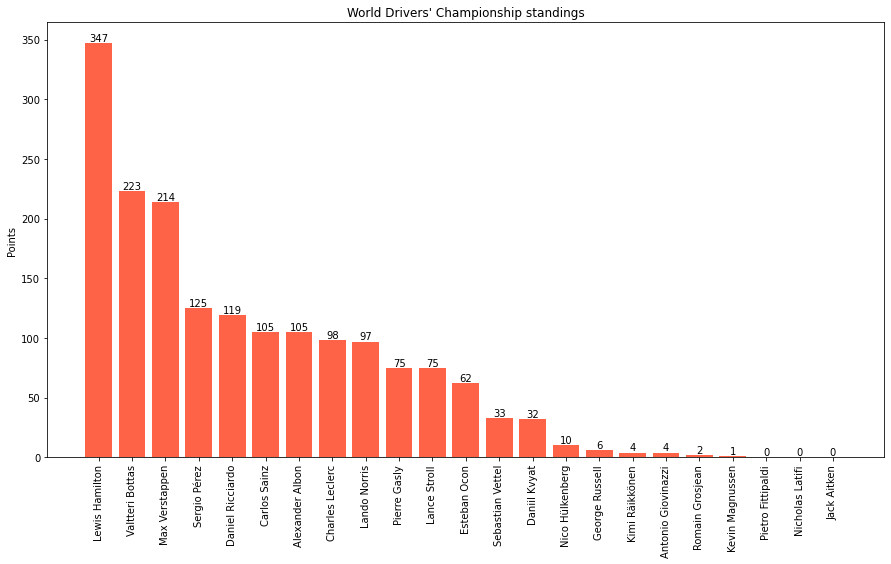

In [682]:
import matplotlib.pyplot as plt
import numpy as np


y = driver_res['sum_points']
x = driver_res['driver_name']

fig, ax = plt.subplots(figsize=(15, 8))

ax.bar(x,y)

ind = np.arange(len(x))
p = ax.bar(ind, y, color = 'tomato')

ax.bar_label(p)

ax.set_title("World Drivers' Championship standings")
ax.set_ylabel('Points')
plt.xticks(rotation=90)


plt.show()

#### 3.5 Кубок конструкторов 

Создадим отчет по результатам сезона для конструкторов, просуммировав их очки за сезон и расположив в порядке убывания количества очков.

При сверке результатов после первого расчета очков по командам обнаружилось расхождение в баллах для комманды Racing Point, расчет показывал на 15 баллов больше. Дополнительно убедившись в правильности методики подсчета очков команды простым суммированием, вскоре было обнаружено, что на данную команду было наложено взыскание 15 баллов. Этот момент был также учтен в скрипте.

In [685]:
constr_res = pd.DataFrame(
    engine.execute(
        '''SELECT constr_name, SUM(points) as sum_points
        FROM df_constr_res
        INNER JOIN df_race_cir_20 ON df_constr_res.raceId = df_race_cir_20.raceId
        INNER JOIN constr ON df_constr_res.constructorId = constr.constructorId
       GROUP BY df_constr_res.constructorId
       ORDER BY sum_points DESC
        '''))

#учет взыскания баллов у Racing Point
constr_res.loc[constr_res["constr_name"] == "Racing Point", "sum_points"] = constr_res["sum_points"] - 15 
constr_res = constr_res.sort_values(by=['sum_points'], ascending=False)

constr_res
                       

,constr_name,sum_points
0,Mercedes,573.0
1,Red Bull,319.0
3,McLaren,202.0
2,Racing Point,195.0
4,Renault,181.0
5,Ferrari,131.0
6,AlphaTauri,107.0
7,Alfa Romeo,8.0
8,Haas,3.0
9,Williams,0.0


Диаграмма отображает результаты кубка конструкторов за сезон 2020 года:

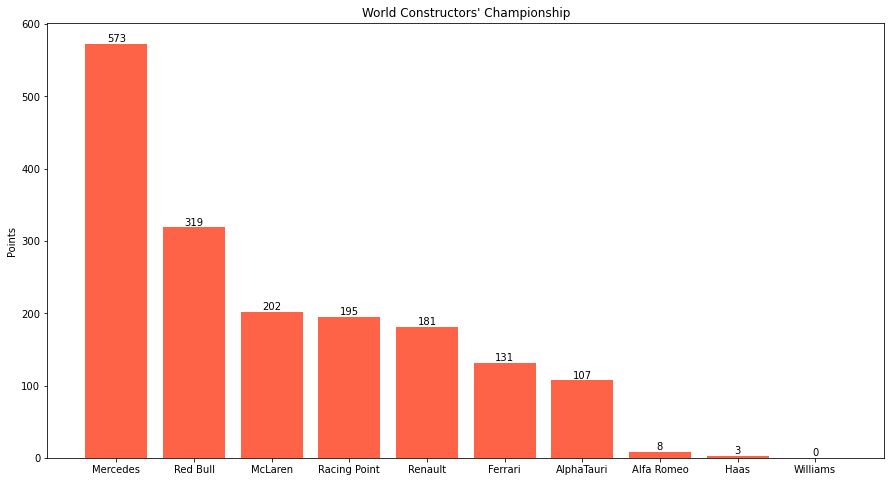

In [684]:
import matplotlib.pyplot as plt
import numpy as np


y = constr_res['sum_points']
x = constr_res['constr_name']

fig, ax = plt.subplots(figsize=(15, 8))

ax.bar(x,y)

ind = np.arange(len(x))
p = ax.bar(ind, y, color = 'tomato')

ax.bar_label(p)

ax.set_title("World Constructors' Championship")
ax.set_ylabel('Points')

plt.show()

### Выводы

В ходе работы над проектом была разобрана совокупность датасетов с результатами гонок Формулы-1 с 1970 по 2022 год, обладающая признаками реляционной базы данных.
Проведен разведочный анализ 14 нормализованных таблиц с данными, установлены значения всех колонок.
Путем обработки и группировки данных по ключевым столбцам были созданы отчетные представления по основным результатам гонок. Сверка данных с имеющимися результатами показала соответсвие данных, полученных в отчетах, реальным результатам гонщиков и команд в 2020 году.
Полученные отчеты визуализированны

В силу ограниченного времени в проекте реализована лишь малая часть возможных исследований, которые можно провести с этими хорошо структурированными данными. В перспективе можно создать больше представлений и визуализаций, провести сравнения между сезонами различных лет, сделать прогнозы на будущее средствами машинного обучния, исследовать различные связи и оценить влияние разных факторов на результаты гонок.